In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression ,Ridge,Lasso
import pandas as pd
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [4]:
col=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv('housing.csv',header=None,delimiter=r'\s+',names=col)

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
X=data.iloc[:,:-1]
y=data['MEDV']

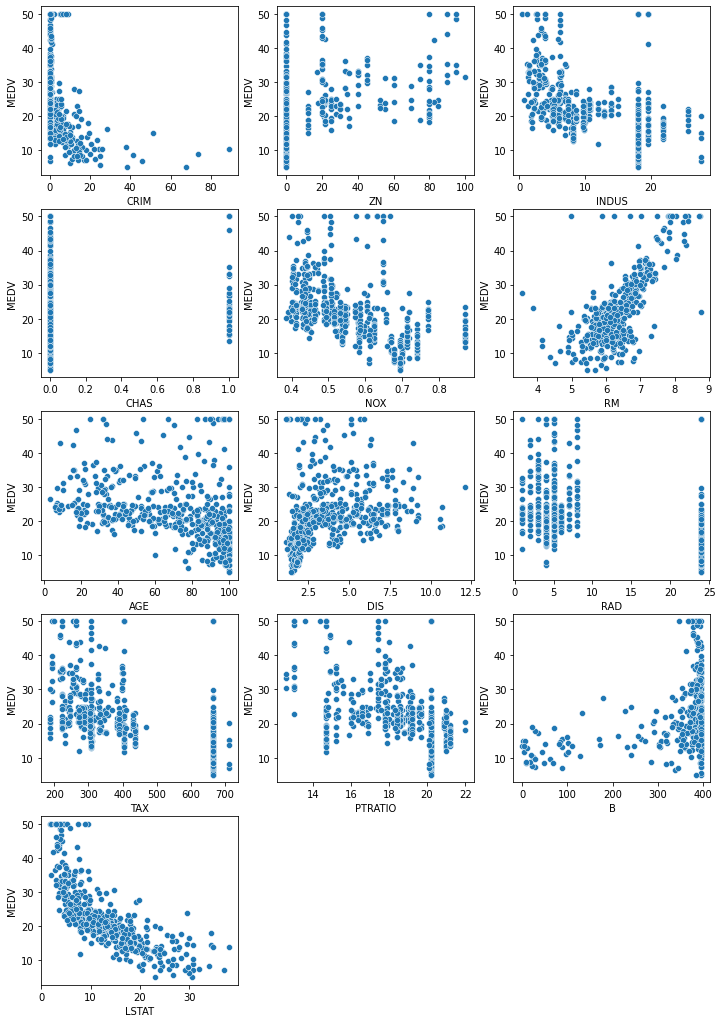

In [7]:
j=1
plt.figure(figsize=(12,18))
for i in data.iloc[:,:-1]:
    # print(i)
    plt.subplot(5,3,j)
    sns.scatterplot(data[i],y)
    j+=1


In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.25)

In [9]:
lr = LinearRegression()
lr.fit(x_train.copy(),y_train.copy())

LinearRegression()

In [10]:
ypred=lr.predict(x_test)

In [11]:
np.sum((y_test-ypred)**2)/y_test.shape[0]

32.44253669600653

In [12]:
from sklearn.metrics import mean_squared_error 

In [13]:
mean_squared_error(y_test,y_pred=ypred)

32.44253669600653

In [14]:
pd.DataFrame({'Actual':y_test,'Pridicted':ypred})

,Actual,Pridicted
305,28.4,31.114396
193,31.1,31.820602
65,23.5,30.556206
349,26.6,22.440421
151,19.6,18.803988
...,...,...
493,21.8,20.928098
142,13.4,13.652837
26,16.6,16.192030
173,23.6,29.251556


In [15]:
ridge = Ridge(alpha=0.02)
ridge.fit(x_train.copy(),y_train.copy())

ridge_pred = ridge.predict(x_test)

lasso = Lasso(alpha=0.001)
lasso.fit(x_train.copy(),y_train.copy())

lasso_pred = ridge.predict(x_test)
print('Score',lr.score(x_test,y_test),ridge.score(x_test,y_test),lasso.score(x_test,y_test))

Score 0.6745585065949424 0.674394536356635 0.6742084355014528


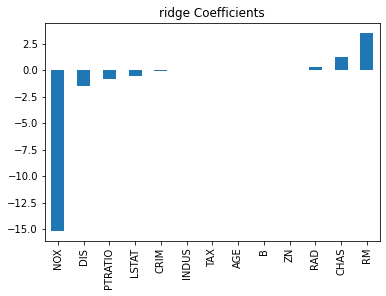

<AxesSubplot:title={'center':'lasso Coefficients'}>

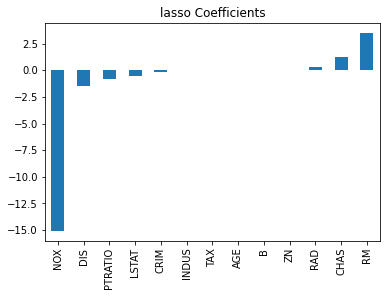

In [16]:
predictors = x_train.columns

coef = pd.Series(ridge.coef_,predictors).sort_values()
coefl = pd.Series(lasso.coef_,predictors).sort_values()

coef.plot(kind='bar', title='ridge Coefficients')
plt.show()
coefl.plot(kind='bar', title='lasso Coefficients')

In [17]:
pd.DataFrame({'Actual':y_test,'Predicted':ypred,
                'Ridge_predicted':ridge_pred,
                'lasso_predicted':lasso_pred}
                ).sample(10)


,Actual,Predicted,Ridge_predicted,lasso_predicted
1,21.6,25.121789,25.112596,25.112596
378,13.1,15.607482,15.605171,15.605171
325,24.6,24.317320,24.335900,24.335900
172,23.1,23.404469,23.386481,23.386481
184,26.4,23.297732,23.284026,23.284026
47,16.6,18.149358,18.132093,18.132093
174,22.6,26.696731,26.686286,26.686286
223,30.1,29.805113,29.794053,29.794053
151,19.6,18.803988,18.850020,18.850020
367,23.1,10.811023,10.789182,10.789182


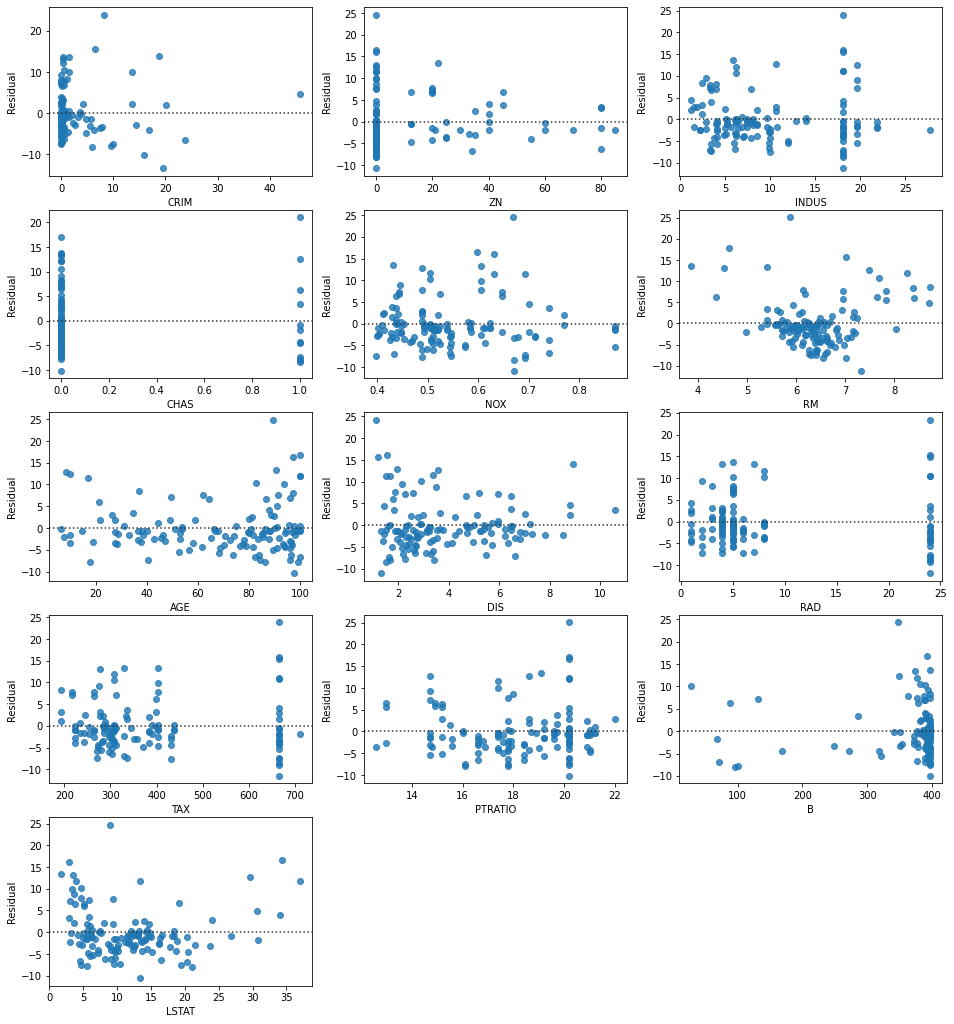

In [18]:
j=1
# print(x_test.iloc[:,0])
plt.figure(figsize=(16,18))
for i in range(len(col)-1):
#     # print(i)
    plt.subplot(5,3,j)
    sns.residplot(x_test.iloc[:,i],(y_test-ypred))
    plt.ylabel('Residual')

    j+=1